In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, log_loss, plot_confusion_matrix, mean_squared_log_error, accuracy_score

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/datasets/tabular feb 22/train.csv")

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/datasets/tabular feb 22/test.csv")

In [ ]:
df_test_id= pd.read_csv("/content/drive/MyDrive/datasets/tabular feb 22/test.csv").row_id

In [ ]:
df_train.drop(columns=['row_id'],axis=1,inplace=True)
df_test.drop(columns=['row_id'],axis=1,inplace=True)

In [ ]:
le = LabelEncoder()
df_train.target = le.fit_transform(df_train.target)
# df_test.target = le.transform(df_test.target)

## pca

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=200)

In [ ]:
pca.fit(df_train.drop(columns=['target'],axis=1))

PCA(n_components=200)

In [ ]:
pca.transform(df_test)

array([[-2.58605309e-02, -5.57551820e-03, -2.31664754e-03, ...,
        -5.49893168e-05,  6.78514734e-05,  3.16461795e-05],
       [-2.98111167e-02, -6.44479445e-04,  2.72630675e-03, ...,
         3.61224799e-04, -3.03749783e-04, -2.16865950e-04],
       [-2.02558836e-02, -5.92245671e-03, -5.14566333e-03, ...,
         4.81176295e-05,  3.49728044e-05,  4.51949832e-05],
       ...,
       [-2.15014896e-02,  4.10118535e-03, -1.26672502e-02, ...,
        -1.27067039e-04,  1.66839011e-04,  6.12148732e-05],
       [ 3.67711619e-02,  4.09408387e-02,  3.34519940e-02, ...,
         2.11964345e-05, -7.20025194e-04,  1.41437789e-04],
       [ 2.48837070e-02, -1.53859873e-02, -8.97440912e-03, ...,
        -5.52587939e-05, -4.61599480e-05, -1.06744386e-04]])

In [ ]:
n_pcs= pca.components_.shape[0]

In [ ]:
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

In [ ]:
initial_feature_names = df_test.columns

In [ ]:
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [ ]:
most_important_names

['A2T2G3C3',
 'A3T1G3C3',
 'A2T4G3C1',
 'A3T3G2C2',
 'A3T1G3C3',
 'A3T3G2C2',
 'A3T3G2C2',
 'A3T3G2C2',
 'A1T3G4C2',
 'A3T2G3C2',
 'A3T2G2C3',
 'A4T3G1C2',
 'A4T2G2C2',
 'A2T3G2C3',
 'A2T4G2C2',
 'A2T2G3C3',
 'A4T3G1C2',
 'A2T3G3C2',
 'A3T4G1C2',
 'A3T3G3C1',
 'A3T4G1C2',
 'A4T4G1C1',
 'A4T2G3C1',
 'A2T2G4C2',
 'A2T2G2C4',
 'A5T2G1C2',
 'A5T3G1C1',
 'A2T4G3C1',
 'A5T2G2C1',
 'A2T5G1C2',
 'A1T4G3C2',
 'A5T2G1C2',
 'A4T2G1C3',
 'A4T1G2C3',
 'A5T1G2C2',
 'A3T5G1C1',
 'A1T4G2C3',
 'A3T2G1C4',
 'A2T1G3C4',
 'A1T5G2C2',
 'A5T1G2C2',
 'A1T4G2C3',
 'A1T2G4C3',
 'A5T1G3C1',
 'A2T1G3C4',
 'A1T5G2C2',
 'A1T5G1C3',
 'A3T1G4C2',
 'A1T5G1C3',
 'A6T2G1C1',
 'A4T1G4C1',
 'A2T1G4C3',
 'A1T5G1C3',
 'A6T2G1C1',
 'A4T3G0C3',
 'A6T1G2C1',
 'A4T4G2C0',
 'A4T3G3C0',
 'A5T3G2C0',
 'A4T4G0C2',
 'A1T4G4C1',
 'A4T1G4C1',
 'A4T1G1C4',
 'A5T1G1C3',
 'A2T1G2C5',
 'A1T6G1C2',
 'A5T3G2C0',
 'A4T1G1C4',
 'A1T5G3C1',
 'A4T4G0C2',
 'A3T5G2C0',
 'A2T1G2C5',
 'A3T4G0C3',
 'A1T4G1C4',
 'A2T1G2C5',
 'A1T2G2C5',
 'A1T2G5C2',

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 287 entries, row_id to A10T0G0C0
dtypes: float64(286), int64(1)
memory usage: 219.0 MB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 288 entries, row_id to target
dtypes: float64(286), int64(1), object(1)
memory usage: 439.5+ MB


In [ ]:
df_train.duplicated().sum()

76007

In [ ]:
df_train.drop_duplicates(keep='first' , inplace=True)

In [ ]:
print(df_train.A0T0G0C10[0])
print(df_train.A0T0G1C9[0])
print(df_train.A0T0G2C8[0])
print(df_train.A0T0G3C7[0])

-9.5e-07
-9.54e-06
-4.29e-05
-0.00011444


In [ ]:
print(df_train.A0T0G0C10[1])
print(df_train.A0T0G1C9[1])
print(df_train.A0T0G2C8[1])
print(df_train.A0T0G3C7[1])

-9.5e-07
-9.54e-06
-4.29e-05
0.0008855


In [ ]:
df_train[df_train.target==4]

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,A0T0G10C0,A0T1G0C9,A0T1G1C8,A0T1G2C7,A0T1G3C6,A0T1G4C5,A0T1G5C4,A0T1G6C3,A0T1G7C2,A0T1G8C1,A0T1G9C0,A0T2G0C8,A0T2G1C7,A0T2G2C6,A0T2G3C5,A0T2G4C4,A0T2G5C3,A0T2G6C2,A0T2G7C1,A0T2G8C0,A0T3G0C7,A0T3G1C6,A0T3G2C5,A0T3G3C4,A0T3G4C3,A0T3G5C2,A0T3G6C1,A0T3G7C0,A0T4G0C6,A0T4G1C5,...,A5T3G2C0,A5T4G0C1,A5T4G1C0,A5T5G0C0,A6T0G0C4,A6T0G1C3,A6T0G2C2,A6T0G3C1,A6T0G4C0,A6T1G0C3,A6T1G1C2,A6T1G2C1,A6T1G3C0,A6T2G0C2,A6T2G1C1,A6T2G2C0,A6T3G0C1,A6T3G1C0,A6T4G0C0,A7T0G0C3,A7T0G1C2,A7T0G2C1,A7T0G3C0,A7T1G0C2,A7T1G1C1,A7T1G2C0,A7T2G0C1,A7T2G1C0,A7T3G0C0,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
12,-9.500000e-07,-9.540000e-06,-0.000043,-0.000114,-2.003000e-04,-0.00024,-2.003000e-04,-0.000114,-0.000043,-0.00001,-9.500000e-07,-9.540000e-06,-0.000086,-0.000343,-0.000801,-0.001202,-0.001202,-0.000801,-0.000343,-0.000086,-0.00001,-0.000043,-0.000343,-0.001202,-0.002403,-0.003004,-0.002403,-0.001202,-0.000343,-0.000043,-0.000114,-0.000801,-0.002403,-0.004005,-0.004005,-0.002403,-0.000801,-0.000114,-0.00020,-0.001202,...,-0.002403,0.008800,-0.001202,0.00976,-0.00020,-0.000801,-0.001202,-0.000801,-0.00020,-0.000801,-0.002403,-0.002403,-0.000801,-0.001202,-0.002403,-0.001202,-0.000801,-0.000801,-0.00020,-0.000114,-0.000343,-0.000343,-0.000114,-0.000343,-0.000687,-0.000343,-0.000343,-0.000343,-0.000114,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.00001,-9.540000e-06,-0.00001,-9.500000e-07,4
23,-9.500000e-07,-9.540000e-06,-0.000043,-0.000114,-2.003000e-04,-0.00024,-2.003000e-04,-0.000114,-0.000043,-0.00001,-9.500000e-07,-9.540000e-06,-0.000086,-0.000343,0.002200,-0.000202,-0.000202,0.002200,0.000657,-0.000086,-0.00001,0.000957,0.000657,-0.001202,-0.000403,0.002996,0.001596,0.000798,0.000657,-0.000043,-0.000114,-0.000801,-0.001403,-0.000005,-0.000005,0.001596,0.000199,-0.000114,0.00080,-0.001202,...,-0.000403,-0.000202,0.000798,0.00176,-0.00020,0.000199,0.000798,-0.000801,-0.00020,0.001199,0.001596,0.002596,0.000199,0.001799,-0.000403,0.001799,-0.000801,0.001199,-0.00020,-0.000114,-0.000343,-0.000343,-0.000114,-0.000343,0.000313,-0.000343,0.000657,-0.000343,-0.000114,-0.000043,-0.000086,0.000957,-0.000086,0.000914,0.000957,-0.00001,-9.540000e-06,-0.00001,-9.500000e-07,4
28,-9.500000e-07,-9.540000e-06,-0.000043,-0.000114,-2.003000e-04,-0.00024,-2.003000e-04,-0.000114,-0.000043,-0.00001,-9.500000e-07,-9.540000e-06,-0.000086,-0.000343,-0.000801,-0.001202,-0.001202,-0.000801,-0.000343,-0.000086,-0.00001,-0.000043,-0.000343,-0.001202,-0.002403,-0.003004,-0.002403,-0.001202,-0.000343,-0.000043,-0.000114,-0.000801,-0.002403,-0.004005,-0.004005,-0.002403,-0.000801,-0.000114,-0.00020,-0.001202,...,-0.002403,0.008800,-0.001202,0.00976,-0.00020,-0.000801,-0.001202,-0.000801,-0.00020,-0.000801,-0.002403,-0.002403,0.009200,-0.001202,-0.002403,-0.001202,-0.000801,-0.000801,-0.00020,-0.000114,-0.000343,-0.000343,-0.000114,-0.000343,-0.000687,0.009660,-0.000343,-0.000343,-0.000114,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.00001,-9.540000e-06,-0.00001,-9.500000e-07,4
40,-9.500000e-07,-9.540000e-06,-0.000043,-0.000114,-2.003000e-04,-0.00024,-2.003000e-04,-0.000114,-0.000043,-0.00001,-9.500000e-07,-9.540000e-06,-0.000086,-0.000343,-0.000801,-0.001202,-0.001202,-0.000801,-0.000343,-0.000086,-0.00001,-0.000043,-0.000343,-0.001202,-0.002403,-0.003004,-0.002403,-0.001202,-0.000343,0.009960,-0.000114,-0.000801,-0.002403,-0.004005,0.005993,-0.002403,-0.000801,-0.000114,-0.00020,-0.001202,...,-0.002403,0.008800,-0.001202,0.00976,-0.00020,-0.000801,-0.001202,-0.000801,-0.00020,-0.000801,-0.002403,-0.002403,-0.000801,-0.001202,-0.002403,-0.001202,-0.000801,-0.000801,-0.00020,-0.000114,-0.000343,-0.000343,-0.000114,-0.000343,-0.000687,-0.000343,-0.000343,-0.000343,-0.000114,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.00001,-9.540000e-06,-0.00001,-9.500000e-07,4
42,-9.500000e-07,5.000000e-0

In [ ]:
cross = pd.merge(df_test,df_train)

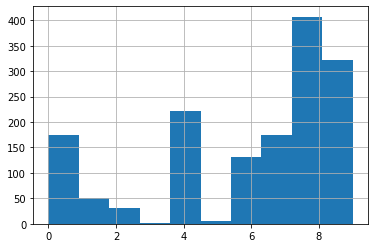

In [ ]:
cross.target.hist()

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 286 entries, A0T0G0C10 to A10T0G0C0
dtypes: float64(286)
memory usage: 218.2 MB


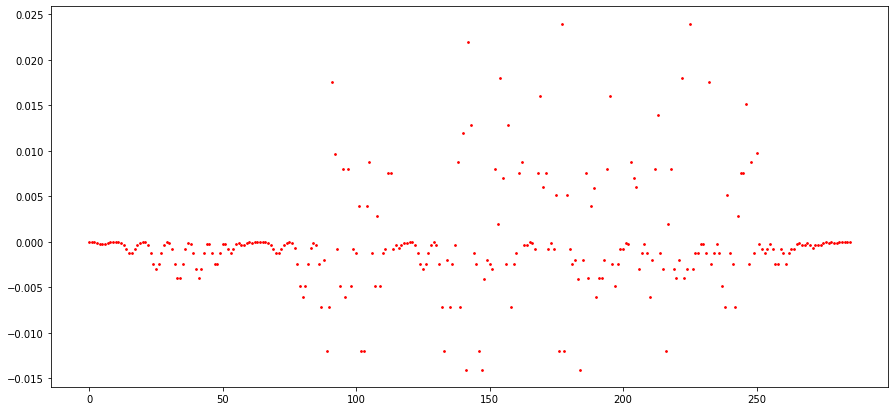

In [ ]:
counter = 0
plt.figure(figsize=(15,7))
for col in df_train.drop(columns=['target']).columns:
    plt.scatter(counter,df_train[col][0],c='red',s=3)
    counter+=1

In [ ]:
print(df_train.target[0])
print(df_train.target[1])

9
6


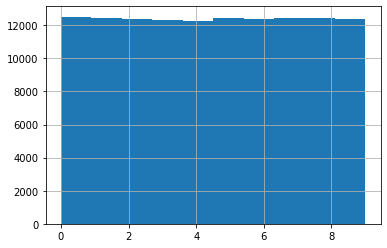

In [ ]:
df_train.target.hist()

In [ ]:
df_train.columns

Index(['row_id', 'A0T0G0C10', 'A0T0G1C9', 'A0T0G2C8', 'A0T0G3C7', 'A0T0G4C6',
       'A0T0G5C5', 'A0T0G6C4', 'A0T0G7C3', 'A0T0G8C2',
       ...
       'A8T0G2C0', 'A8T1G0C1', 'A8T1G1C0', 'A8T2G0C0', 'A9T0G0C1', 'A9T0G1C0',
       'A9T1G0C0', 'A10T0G0C0', 'target', 'diff'],
      dtype='object', length=289)

In [ ]:
corr = df_train.corr()

In [ ]:
corr.columns

Index(['row_id', 'A0T0G0C10', 'A0T0G1C9', 'A0T0G2C8', 'A0T0G3C7', 'A0T0G4C6',
       'A0T0G5C5', 'A0T0G6C4', 'A0T0G7C3', 'A0T0G8C2',
       ...
       'A8T0G1C1', 'A8T0G2C0', 'A8T1G0C1', 'A8T1G1C0', 'A8T2G0C0', 'A9T0G0C1',
       'A9T0G1C0', 'A9T1G0C0', 'A10T0G0C0', 'target'],
      dtype='object', length=288)

In [ ]:
tmp_test = df_train.copy()

In [ ]:
# tmp_test['ten'] = tmp_test.A10T0G0C0 + tmp_test.A0T10G0C0 + tmp_test.A0T0G10C0 + tmp_test.A0T0G0C10
tmp_test['top'] = tmp_test.A3T3G3C1sign + tmp_test.A4T2G1C3sign + tmp_test.A3T3G1C3sign
# tmp_test['A0T0G2C8_sign'] = np.sign(tmp_test.A0T0G2C8)
# tmp_test['A3G2_sum_sign'] = np.sign(tmp_test.A3G2_sum)

# tmp_test['ten'] = tmp_test.A10T0G0C0*tmp_test.A0T10G0C0


In [ ]:
tmp_test['sum_sign'] = 0
for col in tmp_test.columns:
    if "sign" in col:
        tmp_test['sum_sign'] += tmp_test[col]

In [ ]:
tmp_test['A3'] = df_train.A3_min/df_train.A3_max
tmp_test['A7'] = df_train.A7_min/df_train.A7_max
tmp_test['T7'] = df_train.T7_min/df_train.T7_max

In [ ]:
tmp_test['A3_A8'] = df_train.A3_min/df_train.A8_max

In [ ]:
tmp_test['top'] = tmp_test.A3T3G3C1sign+\
      tmp_test.A4T2G1C3sign+\
      tmp_test.A3T3G1C3sign+\
      tmp_test.A3T3G2C2sign+\
      tmp_test.A2T4G3C1sign

In [ ]:
tmp_test[['sum_sign','top','target']].corr()

,sum_sign,top,target
sum_sign,1.000000,-0.134517,0.001018
top,-0.134517,1.000000,0.412651
target,0.001018,0.412651,1.000000


In [ ]:
tmp_test[['top','target']]

,top,target
0,-1.0,9
1,-3.0,6
2,-3.0,6
3,-3.0,6
4,-1.0,2
...,...,...
199995,-3.0,6
199996,-1.0,9
199997,3.0,8
199998,-3.0,7


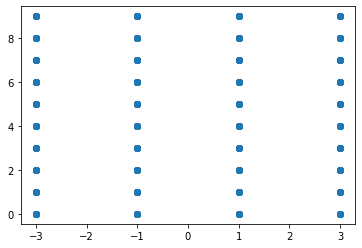

In [ ]:
plt.scatter(tmp_test.top,tmp_test.target)

In [ ]:
np.abs(corr.target).sort_values(ascending = False).head(40)

target        1.000000
A3_min_max    0.164919
A3G2_sum      0.141408
A8_abssum     0.139762
A8_max        0.139762
G9_min        0.138416
T7_abssum     0.129960
T7_max        0.129960
A8G1_sum      0.129071
A3T3G2C2      0.127921
A7_max        0.125647
A7_abssum     0.125647
T7C0_sum      0.121768
A7G1_sum      0.120976
A8G0_sum      0.119890
A7T2G1C0      0.119385
T8C1_sum      0.117629
T8_max        0.117077
T8_abssum     0.117077
T2C0_sum      0.116649
T2_abssum     0.114382
T2_max        0.114382
A3G1_sum      0.112361
A1T7G0C2      0.110803
A8T1G1C0      0.109717
T7C1_sum      0.109433
T1C1_sum      0.108262
A3T7G0C0      0.107044
T7C2_sum      0.106325
T8C0_sum      0.106147
A7G0_sum      0.100417
A1T8G0C1      0.100353
A1T7G1C1      0.099007
T6_max        0.097990
T6_abssum     0.097990
T6C0_sum      0.095876
A4_min_max    0.095630
A4T6G0C0      0.094137
A8T2G0C0      0.092780
T3C0_sum      0.091873
Name: target, dtype: float64

In [ ]:
df_train.target.unique()

array(['Streptococcus_pyogenes', 'Salmonella_enterica',
       'Enterococcus_hirae', 'Escherichia_coli', 'Campylobacter_jejuni',
       'Streptococcus_pneumoniae', 'Staphylococcus_aureus',
       'Escherichia_fergusonii', 'Bacteroides_fragilis',
       'Klebsiella_pneumoniae'], dtype=object)

In [ ]:
np.abs(corr.target).sort_values(ascending = False).head(40)

target       1.000000
A3G2_sum     0.146051
A8_max       0.141625
A8_sqrsum    0.140929
T7_sum       0.139926
T7_abssum    0.139497
A8_abssum    0.138138
A7_sum       0.137815
A7_abssum    0.137640
A8_sum       0.137367
T7_sqrsum    0.134329
A7_sqrsum    0.133520
T3C2_sum     0.133152
T7_max       0.132567
A7_max       0.130068
A8G1_sum     0.129071
A7G1_sum     0.128572
A1G0_sum     0.128381
A3T3G2C2     0.127921
A8G0_sum     0.123619
T8_max       0.123089
T0_min       0.122295
T8_sqrsum    0.122238
A3_min       0.120556
A7T2G1C0     0.119385
T8_abssum    0.119016
T8_sum       0.118086
T8C1_sum     0.117629
T1C0_sum     0.116900
T0C1_sum     0.116030
T3_min       0.114804
A1G1_sum     0.114623
T7C0_sum     0.112449
T7C1_sum     0.110862
A1T7G0C2     0.110803
T8C0_sum     0.110689
A8T1G1C0     0.109717
C0_max       0.109341
A3T7G0C0     0.107044
T7C2_sum     0.106325
Name: target, dtype: float64

In [ ]:
def feature_engineering_norma_loss(df):
    data = df.copy()
    for col in data.columns:
        if col not in ['target','row_id']:
            A_ind = int(col.split('A')[1].split('T')[0])
            G_ind = int(col.split('A')[1].split('T')[1].split('G')[0])
            T_ind = int(col.split('A')[1].split('T')[1].split('G')[1].split('C')[0])
            C_ind = int(col.split('A')[1].split('T')[1].split('G')[1].split('C')[1])
            data[col] /= np.math.factorial(A_ind + G_ind + T_ind + C_ind) / \
                        np.math.factorial(A_ind)*\
                        np.math.factorial(G_ind)*\
                        np.math.factorial(T_ind)*\
                        np.math.factorial(C_ind)
    return data

In [ ]:
def feature_engineering(df,is_test = False):
    if is_test:
        cols2del = df.columns
    else:
        cols2del = df.drop(columns=['target'],axis=1).columns
    data = df.copy()


    for idx in range(10):
        # data["A"+str(idx)+"_sum"] = 0
        for symb in ['A','T','G','C']:
            # data[symb+str(idx)+"_max"] = 0
            # data[symb+str(idx)+"_min"] = 0
            data[symb+str(idx)+"_abssum"] = 0           
    for col in data.columns:
        for idx in range(10):
            for symb in ['A','T','G','C']:
                if symb+str(idx) in col and symb+"10" not in col:
                    # data[symb+str(idx)+"_max"] = data[[col,symb+str(idx)+"_max"]].max(axis=1)  
                    # data[symb+str(idx)+"_min"] = data[[col,symb+str(idx)+"_min"]].min(axis=1) 
                    data[symb+str(idx)+"_abssum"] += np.abs(data[col])
    # for idx in range(10):
        # for symb in ['A','T','G','C']:
            # data[symb+str(idx)+"_min_max"] = data[symb+str(idx)+"_min"]/data[symb+str(idx)+"_max"]
    
    # пурины
    for col in data.columns:
        for idxA in range(10):     
            for idxG in range(10):
                if 'A'+str(idxA) in col and 'G'+str(idxG) in col:
                    data['A'+str(idxA)+'G'+str(idxG)+'_sum'] = 0
    for col in data.columns:
        for idxA in range(10):     
            for idxG in range(10):
                if 'A'+str(idxA) in col and 'G'+str(idxG) in col:
                    data['A'+str(idxA)+'G'+str(idxG)+'_sum'] += data[col]
    # пирамидины
    for col in data.columns:
        for idxT in range(10):     
            for idxC in range(10):
                if 'C'+str(idxC) in col and 'T'+str(idxT) in col:
                    data['T'+str(idxT)+'C'+str(idxC)+'_sum'] = 0
    for col in data.columns:
        for idxT in range(10):     
            for idxC in range(10):
                if 'C'+str(idxC) in col and 'T'+str(idxT) in col:
                    data['T'+str(idxT)+'C'+str(idxC)+'_sum'] += data[col]


    data["joker"] = np.sign(data.A3T3G3C1)+\
                    np.sign(data.A4T2G1C3)+\
                    np.sign(data.A3T3G1C3)+\
                    np.sign(data.A3T3G2C2)+\
                    np.sign(data.A2T4G3C1)
    data = data.drop(columns=cols2del,axis=1)          
    return data

In [ ]:
df_train = feature_engineering_norma_loss(df_train)
df_test = feature_engineering_norma_loss(df_test)

In [ ]:
df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test,True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, u

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 169 entries, A0_abssum to joker
dtypes: float64(169)
memory usage: 128.9 MB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123993 entries, 0 to 199997
Columns: 170 entries, target to joker
dtypes: float64(169), int64(1)
memory usage: 161.8 MB


In [ ]:
# for col in tmp.columns:
#     print(col)
corr = df_train.corr()

In [ ]:
corr

,joker,target
joker,1.000000,0.412651
target,0.412651,1.000000


In [ ]:
corr['A2_abssum'].target

0.012018595174882336

In [ ]:
np.abs(corr.target).sort_values(ascending = False)[:20]

target       1.000000
joker        0.497407
A3G2_sum     0.185114
T3C2_sum     0.181994
G9_min       0.170939
A8_abssum    0.166389
A8_max       0.166389
A8G1_sum     0.161652
A1G0_sum     0.153566
T8_abssum    0.152458
T8_max       0.152458
T8C1_sum     0.151116
T1C0_sum     0.150121
T0C1_sum     0.149845
A1G1_sum     0.149183
A8G0_sum     0.149010
T8C0_sum     0.143628
T7_max       0.137394
T7_abssum    0.137394
A0G1_sum     0.136305
Name: target, dtype: float64

In [ ]:
np.abs(corr.target).sort_values(ascending = False)[:20]

target       1.000000
joker        0.497407
A3G2_sum     0.185114
T3C2_sum     0.181994
G9_min       0.170939
A8_abssum    0.166389
A8_max       0.166389
A3T3G2C2     0.163037
A8G1_sum     0.161652
A1G0_sum     0.153566
T8_abssum    0.152458
T8_max       0.152458
T8C1_sum     0.151116
T1C0_sum     0.150121
T0C1_sum     0.149845
A1G1_sum     0.149183
A8G0_sum     0.149010
T8C0_sum     0.143628
A8T1G1C0     0.140998
T7_max       0.137394
Name: target, dtype: float64

In [ ]:
np.abs(corr.target).sort_values(ascending = True)[:50]

A3G7_sum      0.000200
A3T0G7C0      0.000200
T0C8_sum      0.000317
A0T2G3C5      0.000320
T4C0_sum      0.000363
T5_min        0.000383
A1T1G2C6      0.000423
A1T2G7C0      0.000509
A5T0G2C3      0.000523
A0T0G2C8      0.000587
A1T1G6C2      0.000676
A1T1G1C7      0.000818
A1T1G5C3      0.000915
A5_abssum     0.000945
A5_max        0.000945
C9_abssum     0.001120
C9_max        0.001120
A2_min_max    0.001273
A5G2_sum      0.001320
A4G0_sum      0.001379
A0G8_sum      0.001424
row_id        0.001500
A2T0G1C7      0.001613
G2_min        0.001856
A6G4_sum      0.001911
A6T0G4C0      0.001911
A0T0G9C1      0.001956
C1_min_max    0.001978
A0T0G1C9      0.002008
A5G5_sum      0.002017
A5T0G5C0      0.002017
A1G6_sum      0.002099
A1T1G0C8      0.002102
A5_min        0.002104
A3T0G3C4      0.002202
A4T1G3C2      0.002205
A0T4G5C1      0.002234
A1T0G2C7      0.002336
T0C9_sum      0.002351
A0G4_sum      0.002362
T1C5_sum      0.002417
A5T3G1C1      0.002449
A1T1G8C0      0.002468
A1G7_sum   

## EDA

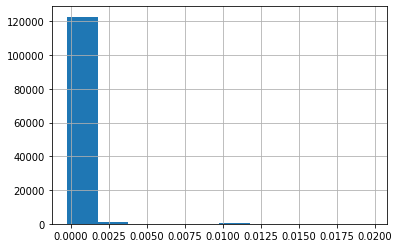

In [ ]:
df_train.A0T0G5C5.hist()

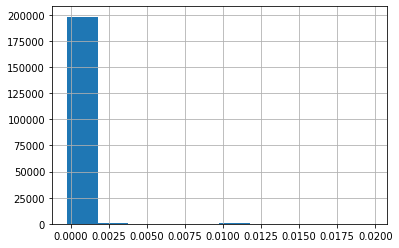

In [ ]:
df_train.A0T5G0C5.hist()

In [ ]:
df_train['diff'] = np.abs(df_train.A0T5G0C5)+np.abs(df_train.A0T0G5C5)+np.abs(df_train.A5T5G0C0)+np.abs(df_train.A5T0G5C0)
df_train[['A0T5G0C5','A0T0G5C5','diff','target']].corr()

,A0T5G0C5,A0T0G5C5,diff,target
A0T5G0C5,1.000000,-0.013324,0.044320,0.015160
A0T0G5C5,-0.013324,1.000000,0.065175,0.031956
diff,0.044320,0.065175,1.000000,-0.037834
target,0.015160,0.031956,-0.037834,1.000000


In [ ]:
df_train.target

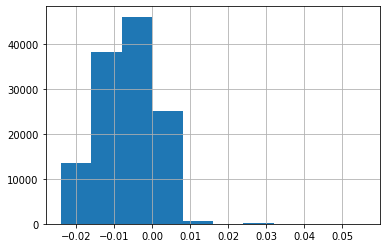

In [ ]:
df_train.A2T2G3C3.hist()

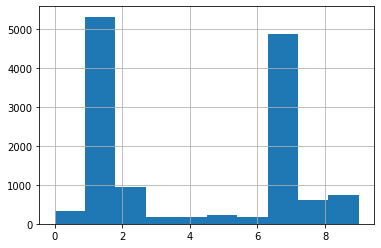

In [ ]:
df_train[(df_train.A2T2G3C3 > -0.0251) & (df_train.A2T2G3C3 <= -0.016)].target.hist()

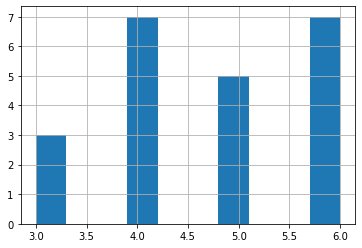

In [ ]:
df_train[(df_train.A2T2G3C3 > 0.04) & (df_train.A2T2G3C3 <= 0.048)].target.hist()

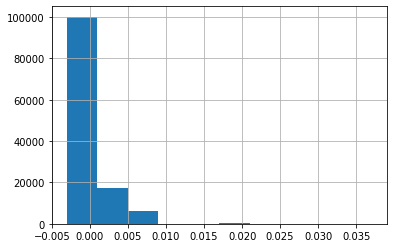

In [ ]:
df_train.A2T0G4C4.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


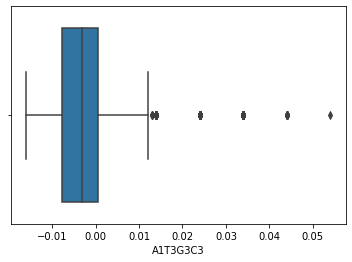

In [ ]:
sns.boxplot(df_train.A1T3G3C3)

In [ ]:
df_train[['A0T0G1C9','target']][df_train.target==4].A0T0G1C9.value_counts(

)

-7.244732e-18    13210
 7.973761e-18     1698
 3.797029e-19     1172
-6.454950e-18     1113
-4.207108e-18      562
 1.139109e-18      559
 2.627544e-18      547
-1.944079e-18      543
-4.981702e-18      533
Name: A0T0G1C9, dtype: int64

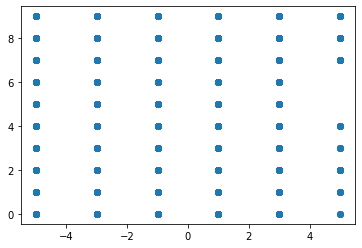

In [ ]:
plt.scatter(df_train['joker'],df_train['target'])

In [ ]:
df_train['A9T1G0C0'].value_counts(bins=10)

(-0.00100295, 0.000199]    198543
(0.000799, 0.000999]          821
(0.000199, 0.000399]          630
(0.0018, 0.002]                 6
(0.000399, 0.000599]            0
(0.000599, 0.000799]            0
(0.000999, 0.0012]              0
(0.0012, 0.0014]                0
(0.0014, 0.0016]                0
(0.0016, 0.0018]                0
Name: A9T1G0C0, dtype: int64

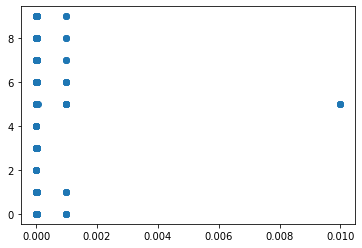

In [ ]:
plt.scatter(df_train['A0T0G1C9'],df_train['target'])

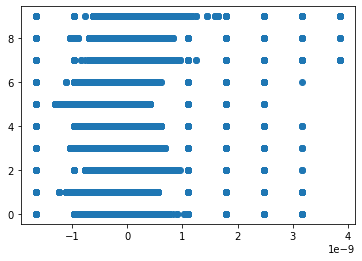

In [ ]:
plt.scatter(df_train['A3T3G2C2'],df_train['target'])

In [ ]:
df_train.A1T0G3C6.value_counts(ascending=False,bins=5)

(-0.0018310000000000002, 0.0052]    196553
(0.0052, 0.0112]                      3203
(0.0172, 0.0232]                       229
(0.0232, 0.0292]                         8
(0.0112, 0.0172]                         7
Name: A1T0G3C6, dtype: int64

In [ ]:
df_train.A2T2G5C1.value_counts(ascending=False,bins=5)

(-1.003, -0.6]    171177
(0.6, 1.0]         28823
(-0.6, -0.2]           0
(-0.2, 0.2]            0
(0.2, 0.6]             0
Name: A2T2G5C1, dtype: int64

In [ ]:
groups = df_train.A2T2G5C1.value_counts(ascending=False,bins=2)

In [ ]:
groups.index[1].left

0.0188

In [ ]:
split_num = 1
for col in df_train.drop(columns=['row_id','target'],axis=1).columns:
    groups = df_train[col].value_counts(ascending=False,bins=split_num+1)
    if groups.array[split_num] < 200:
        df_train = df_train.drop(df_train[(df_train[col] <= groups.index[split_num].right) & (df_train[col] > groups.index[split_num].left)].index)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192468 entries, 0 to 199999
Columns: 328 entries, row_id to C9_sum
dtypes: float64(326), int64(2)
memory usage: 487.1 MB


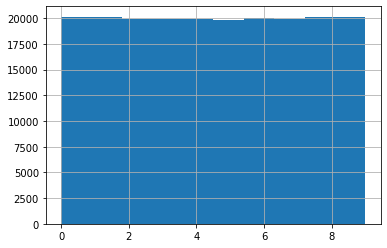

In [ ]:
# plt.figure(figsize=(12,8))
df_train.target.hist(bins=10)

In [ ]:
df_train

In [ ]:
tmp.duplicated().unique()

array([False])

## Fitting

In [ ]:
!pip install catboost --quiet

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, log_loss, plot_confusion_matrix, mean_squared_log_error, accuracy_score

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier

In [ ]:
le.inverse_transform([4])

array(['Escherichia_fergusonii'], dtype=object)

In [ ]:
# model = CatBoostClassifier(
#     random_state = 79637,
#     verbose=10
# )
    
model = LGBMClassifier(
    random_state = 79637,
    verbosity = 10
    # path_smooth = 10,
    # min_sample_leaf = 2,
    # boosting_type = 'gbdt',
    # objective = 'multiclass',
    # num_class = 10,
    # metric = 'multi_logloss',
    # learning_rate = 0.002296,
    # max_depth = 7,
    # num_leaves = 17,
    # feature_fraction = 0.4,
    # bagging_fraction = 0.6,
    # bagging_freq = 17
    )

In [ ]:
# X = df_train.drop(columns=del2,axis=1)
X = df_train.drop(columns=['target'],axis=1)
# X = X.drop(columns=del2,axis=1)
y = df_train.target

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state = 79637)

In [ ]:
model = ExtraTreesClassifier(
    # bootstrap=True,
    n_estimators=100,
    # min_samples_split=5,
    # min_samples_leaf=5,
    # min_impurity_decrease=0.0001,
    # max_features='sqrt',
    # max_depth=30,
    # verbose=1,
    n_jobs=-1,
    random_state=79637
)

In [ ]:
model.fit(X_train,y_train)

ExtraTreesClassifier(n_jobs=-1, random_state=79637)

In [ ]:
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 79637,
 'verbose': 0,
 'warm_start': False}

In [ ]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
print(mean_squared_log_error(y_train,pred_train))
print(mean_squared_log_error(y_test,pred_test))

0.0
0.050247834963169535


In [ ]:
print(accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_test))

1.0
0.9550458493624641


In [ ]:
le.transform(pred_train)

array([1, 4, 1, ..., 5, 5, 4])

In [ ]:
print(con)

[[10788    61   354   318   334    62   354   270   602   375]
 [  451 11579   131     0    18     1     0   938    79   151]
 [  746   488  9821    56    88     6     0   664   515   865]
 [  156     2    10  9399  1184   544  1840    13    15    23]
 [  131     0    35  1609  9817   307  1360    10    27    44]
 [   45     0     1   151   167 12426   455     0    12     3]
 [   95     6     5   698   383   994 11096     7    13    19]
 [  424   856    70     4    61     0     0 11666    98   217]
 [ 1088   207   413    59   129    14    12   616 10042   764]
 [  795   221   785    46   192     6    19   812   906  9594]]


In [ ]:
print(confusion_matrix(y_test,pred_test))

[[3961    6   21   23   16    3   10    5   33   30]
 [   1 4028    9    0    1    0    0   56    4    8]
 [  15   26 3914    2    4    0    0   56   33   68]
 [  14    1    4 3906   87   23   66    1    3    2]
 [  13    2    2  131 3935   22   39    1    1    3]
 [   5    0    1   24   10 4060   16    0    1    1]
 [   8    0    1   78   49   75 3912    2    1    3]
 [   5   70   11    1    1    0    0 4008   10   12]
 [  66   13   41    6    1    3    1   20 3995   60]
 [  28   19   69    1    3    0    1   37   94 3919]]


In [ ]:
print(confusion_matrix(y_test,pred_test))

[[6651    1    3   12   16    8    7   10   14   11]
 [   3 6568   17    0    5    2    0   21    8   12]
 [  15    9 6519    3    3    2    2   21   18   29]
 [   4    0    0 6373   85   58  103    5    1    0]
 [  14    1    1  122 6489   33   41    4    4    2]
 [   6    0    0    5   10 6436    9    0    0    3]
 [   9    0    0   78   56   23 6591    1    4    2]
 [   8   24   13    0    4    0    4 6628   12    5]
 [  19   10   13    2    9    4    5   14 6542   21]
 [  16    7   24    7    4    1    4    6   23 6675]]


In [ ]:
print(confusion_matrix(y_test,pred_test))

[[4003    8   17   23   12    4    5    5   18   13]
 [   1 4038    7    1    0    0    0   49    3    8]
 [   7   17 3945    6    3    0    0   60   26   54]
 [   5    3    0 3945   73   22   52    2    5    0]
 [   7    2    3   95 3975   22   40    1    3    1]
 [   1    0    0   18    5 4080   12    0    1    1]
 [   3    1    1   57   36   72 3955    1    2    1]
 [   3   55    4    0    0    0    0 4037   10    9]
 [  54   13   27    5    6    1    3   21 4024   52]
 [  19   23   55    2    3    0    0   30   79 3960]]


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 337 entries, row_id to T9_sqrsum
dtypes: float64(335), int64(2)
memory usage: 514.2 MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 317 entries, A0T0G0C10 to G9_sqrsum
dtypes: float64(317)
memory usage: 241.9 MB


In [ ]:
df_test.columns

Index(['row_id', 'A0T0G0C10', 'A0T0G1C9', 'A0T0G2C8', 'A0T0G3C7', 'A0T0G4C6',
       'A0T0G5C5', 'A0T0G6C4', 'A0T0G7C3', 'A0T0G8C2',
       ...
       'G7_sum', 'C7_sum', 'A8_sum', 'T8_sum', 'G8_sum', 'C8_sum', 'A9_sum',
       'T9_sum', 'G9_sum', 'C9_sum'],
      dtype='object', length=327)

In [ ]:
pred = model.predict(df_test[X_train.columns])

In [ ]:
del2.append('row_id')

In [ ]:
np.ravel(pred)

array([4, 6, 2, ..., 8, 0, 9])

In [ ]:
sub = pd.DataFrame({'row_id':df_test.row_id,
                    'target':le.inverse_transform(np.ravel(pred))})

In [ ]:
sub = pd.DataFrame({'row_id':df_test_id,
                    'target':le.inverse_transform(pred)})

In [ ]:
sub

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus
...,...,...
99995,299995,Streptococcus_pneumoniae
99996,299996,Escherichia_fergusonii
99997,299997,Streptococcus_pyogenes
99998,299998,Streptococcus_pneumoniae


In [ ]:
sub.to_csv("extr_09_02-2.csv",index=False)

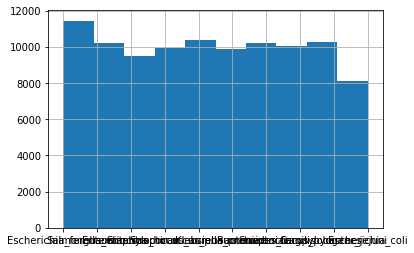

In [ ]:
sub.target.hist()

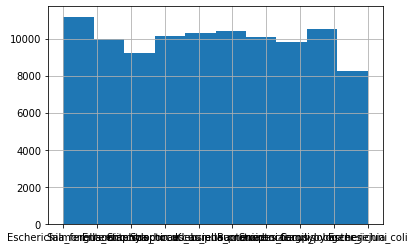

In [ ]:
sub.target.hist()

In [ ]:
df_train.A3_min_max

0        -0.127256
1        -0.123288
2        -0.157034
3        -0.169149
4        -0.081850
            ...   
199995   -0.170892
199996   -0.136104
199997   -0.131469
199998   -0.098778
199999   -0.176248
Name: A3_min_max, Length: 200000, dtype: float64

In [ ]:
imp = pd.DataFrame({'imp':model.feature_importances_,
              'col':X.columns}).sort_values(by="imp",ascending=True)

In [ ]:
imp.head(20)

,imp,col
121,0.000121,A2T0G0C8
29,0.000124,A0T2G8C0
173,0.000150,A3T0G7C0
9,0.000156,A0T0G9C1
66,0.000160,A1T0G0C9
539,0.000169,T3C7_sum
402,0.000178,G9_abssum
21,0.000186,A0T2G0C8
28,0.000187,A0T2G7C1
482,0.000193,A3G7_sum


In [ ]:
X_train.A3T3G2C2sign

167888    1.0
129655   -1.0
49620    -1.0
15436     1.0
96282     1.0
         ... 
101536   -1.0
21098    -1.0
107128   -1.0
76196     1.0
177609   -1.0
Name: A3T3G2C2sign, Length: 133333, dtype: float64

In [ ]:
top_feat = list(imp[imp.imp > 0].col)

In [ ]:
imp.A3

In [ ]:
top_feat = list(imp[imp.imp >= 20].col)

In [ ]:
np.abs(X_train.A0T0G2C8)

43163     0.000043
147436    0.000043
7630      0.000043
81264     0.000043
112320    0.000001
            ...   
133362    0.000043
155387    0.000043
104003    0.000043
189668    0.000043
5409      0.000043
Name: A0T0G2C8, Length: 133333, dtype: float64

## blending

In [ ]:
sub6 = pd.read_csv("/content/baseline_06_02-6.csv")
sub7 = pd.read_csv("/content/baseline_06_02-7.csv")
sub8 = pd.read_csv("/content/baseline_06_02-8.csv")

In [ ]:
sub_blend = pd.DataFrame({'row_id':sub6.row_id,
                          'sub6':sub6.target,
                          'sub7':sub7.target,
                          'sub8':sub8.target})

In [ ]:
sub_blend.sub6 = le.fit_transform(sub_blend.sub6)
sub_blend.sub7 = le.transform(sub_blend.sub7)
sub_blend.sub8 = le.transform(sub_blend.sub8)

In [ ]:
sub_blend['target'] = sub_blend[['sub6','sub7','sub8']].median(axis=1).astype(int)

In [ ]:
sub_blend.target = le.inverse_transform(sub_blend.target)

## optuna

In [ ]:
!pip install optuna --quiet

     |████████████████████████████████| 308 kB 4.1 MB/s 
     |████████████████████████████████| 80 kB 8.4 MB/s 
     |████████████████████████████████| 210 kB 51.7 MB/s 
     |████████████████████████████████| 75 kB 4.3 MB/s 
     |████████████████████████████████| 149 kB 48.5 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 113 kB 47.6 MB/s 


In [ ]:
import optuna
from sklearn.model_selection import cross_validate
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
def objective(trial,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 79637)
    # ниже определяются области определения гиперпараметров
    # подробнее тут (https://optuna.readthedocs.io/en/stable/reference/generated/optuna.trial.Trial.html?highlight=suggest#optuna.trial.Trial.suggest_int)
    param = {
            "n_estimators" : trial.suggest_int('n_estimators', 400, 1000),
            'max_depth':trial.suggest_int('max_depth', 4, 8),
            'reg_alpha':trial.suggest_loguniform('reg_alpha', 0.01, 10),
            'reg_lambda':trial.suggest_loguniform('reg_lambda', 0.01, 10),
            'min_child_weight':trial.suggest_loguniform('min_child_weight', 0.01, 10),
            'gamma':trial.suggest_loguniform('gamma', 0.01, 15),
            'lambda':trial.suggest_loguniform('lambda', 0.01, 15),
            'eta':trial.suggest_loguniform('eta', 0.005, 0.03),
            'learning_rate':trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.5, 1, 0.01),
            'nthread' : -1,
            'eval_metric': 'mlogloss',
            'objective': 'multi:softmax',
            'tree_method': 'gpu_hist',
            'num_class': 10
            }
    model = XGBClassifier()
    model.set_params(**param, use_label_encoder=False)

    model.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=2)
    y_preds = model.predict(X_test)
    return accuracy_score(y_test, y_preds)

In [ ]:
# X = df_train.drop(columns=del2,axis=1)
X = df_train.drop(columns=['target'],axis=1)
# X = X.drop(columns=del2,axis=1)
y = df_train.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state = 79637)

In [ ]:
# best_params = []

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial : objective(trial, X, y), n_trials = 5)
# best_params.append(study.best_params)

In [ ]:
[{'colsample_bytree': 0.96,
  'eta': 0.02036739423647548,
  'gamma': 6.4299697918643774,
  'lambda': 0.05306946601563731,
  'learning_rate': 0.07300707703275978,
  'max_depth': 7,
  'min_child_weight': 0.03950816276739015,
  'n_estimators': 524,
  'reg_alpha': 2.019547189048248,
  'reg_lambda': 1.5956101512183365}]

In [ ]:
model = XGBClassifier(
    colsample_bytree = 0.96,
    eta = 0.02036739423647548,
    gamma = 6.4299697918643774,
    # lambda = 0.05306946601563731,
    learning_rate = 0.07300707703275978,
    max_depth = 7,
    min_child_weight = 0.03950816276739015,
    n_estimators = 524,
    reg_alpha = 2.019547189048248,
    reg_lambda = 1.5956101512183365,
    tree_method = 'gpu_hist'
)

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
param = {'colsample_bytree': 0.67,
  'eta': 0.02091410171529332,
  'gamma': 0.6850100958702302,
  'lambda': 0.05306946601563731,
  'learning_rate': 0.11255201293093048,
  'max_depth': 6,
  'min_child_weight': 0.7837016377461853,
  'n_estimators': 715,
  
  'reg_alpha': 0.0159942164295646,
  'reg_lambda': 0.045197677902998314}

In [ ]:
model.fit(X_train,y_train, verbose=1)

In [ ]:
imp = pd.DataFrame({'imp':model.feature_importances_,
              'col':X.columns}).sort_values(by="imp",ascending=True)

In [ ]:
imp

,imp,col
20,0.000000,A0T1G9C0
75,0.000000,A1T0G9C0
395,0.000000,A9_min
455,0.000056,A0G9_sum
250,0.000114,A5T5G0C0
...,...,...
548,0.022226,T4C5_sum
572,0.022291,T9C1_sum
350,0.026169,T5_min
65,0.040804,A0T10G0C0


In [ ]:
top_feat = list(imp[imp.imp > 0.001].col)

In [ ]:
cols4shap = imp.tail(20).col

In [ ]:
len(top_feat)

193

In [ ]:
len(top_feat)

575

In [ ]:
preds = bst.predict(dtest).astype(int)

In [ ]:
preds_tr = bst.predict(dtrain).astype(int)

In [ ]:
pred_tr = le.inverse_transform(np.round(preds_tr).astype(int))

In [ ]:
preds

array([7.409751 , 5.5938115, 7.443043 , ..., 5.7706475, 2.7168996,
       7.409751 ], dtype=float32)

array([7, 6, 7, ..., 6, 3, 7])

In [ ]:
pred = le.inverse_transform(np.round(preds).astype(int))

In [ ]:
model.fit(X_train[top_feat],y_train)

XGBClassifier(colsample_bytree=0.67, eta=0.02091410171529332,
              gamma=0.6850100958702302, learning_rate=0.11255201293093048,
              max_depth=6, min_child_weight=0.7837016377461853,
              n_estimators=715, objective='multi:softprob', random_state=79637,
              reg_alpha=0.0159942164295646, reg_lambda=0.045197677902998314,
              tree_method='gpu_hist')

In [ ]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
print(mean_squared_log_error(y_train,pred_train))
print(mean_squared_log_error(y_test,pred_test))

0.0
0.035707823489746986


In [ ]:
print(accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_test))

1.0
0.9652802980813433


In [ ]:
y_test

114450    8
171129    7
99833     8
197610    6
29371     9
         ..
27308     1
61169     6
110587    9
183367    2
121269    8
Name: target, Length: 66667, dtype: int64

In [ ]:
preds

array([7, 5, 7, ..., 5, 2, 7])

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'xgb.pkl')

['xgb.pkl']

In [ ]:
!pip install shap --quiet

     |████████████████████████████████| 564 kB 10.2 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train[cols4shap].columns)

In [ ]:
shap.summary_plot(shap_values, X_train.columns)

## stacking